In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


import torch.multiprocessing as mp
from torch.utils.data.distributed import DistributedSampler
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.distributed import init_process_group, destroy_process_group
import os
import numpy as np
import h5py
import json

import sklearn
import numpy.random as random
import corner
import builtins
import scipy
import time
from tqdm import tqdm 
import utils 
import sys
import glob
import models
from losses import *

# Imports neural net tools
import itertools
import torch
import torch.nn as nn
import torch.utils.data
from torch.autograd.variable import *
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,  auc
from torchmetrics import Accuracy
from torchsummary import summary
from sklearn.decomposition import PCA
import torchsummary
from sklearn.preprocessing import OneHotEncoder
from loguru import logger

In [4]:
a = torch.rand(10,4)
b = torch.rand(10,15)

tensor([False, False, False,  True, False, False,  True,  True,  True, False])

In [8]:
(b[:, 0] < 0.2) & (b[:, 0] > 0.1)

tensor([False, False, False,  True, False, False, False,  True,  True, False])

In [2]:
jet_f=torch.load('100k_jet_f')
l= torch.load('100k_l')
x_sv =torch.load('100k_x_sv')
x_pf = torch.load('100k_x_pf')

In [ ]:
import importlib

In [3]:
os.mkdir('test_plots/sv_plots')

FileExistsError: [Errno 17] File exists: 'test_plots/sv_plots'

In [4]:
from dataset_loader_gpu import zpr_loader
ipath = '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/'
vpath = '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/val/raw/'
data_train = zpr_loader(vpath,maxfiles=5)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.07it/s]


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/holystore01/LABS/iaifi_lab/Users/nswood/mambaforge/envs/flat-samples/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/holystore01/LABS/iaifi_lab/Users/nswood/mambaforge/envs/flat-samples/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: Data h

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/holystore01/LABS/iaifi_lab/Users/nswood/mambaforge/envs/flat-samples/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMi

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
/n/home11/nswood/FlatSamples_Dev/utils.py:215: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.png')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:216: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(outdir+'/'+'ipart_'+str(ipart)+'_'+feature_labels[ifeat]+'.pdf')
/n/home11/nswood/FlatSamples_Dev/utils.py:214: UserWarning: AutoMinorLocator does not work wi

IndexError: list index out of range

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

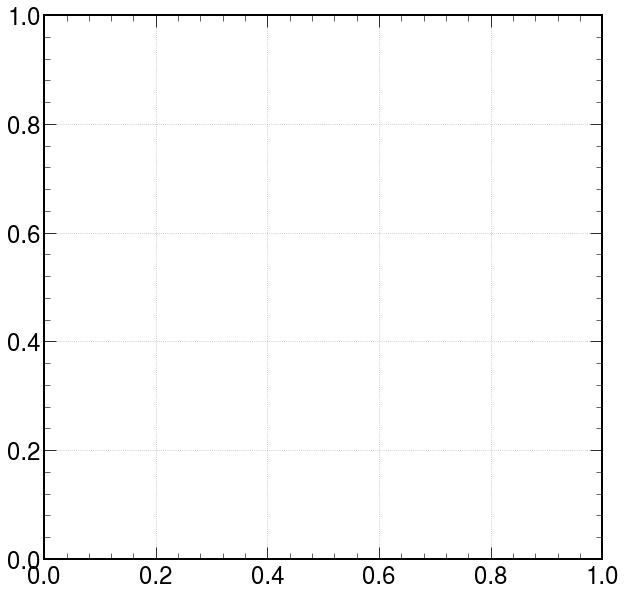

In [7]:
import importlib 
importlib.reload(utils)
# utils.plot_features(x_sv,l,utils._SV_features_labels,'test_plots/sv_plots')
utils.plot_features(x_sv,l,utils._SV_features_labels,'test_plots',"SV")
utils.plot_features(x_pf,l,utils._p_features_labels,'test_plots',"Particle")